In [2]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager
import bisect
font = font_manager.FontProperties(family=['Arial', 'LiHei Pro'],
                                   style='normal', size=12)
plt.style.use("seaborn-v0_8") # beautiful!

In [5]:
def random_chord_by_two_points():
    t1 = np.random.uniform(0.0, 2*np.pi)
    t2 = np.random.uniform(0.0, 2*np.pi)
    p1 = np.array([np.cos(t1), np.sin(t1)])
    p2 = np.array([np.cos(t2), np.sin(t2)])
    return np.linalg.norm(p2-p1, ord=2)

def random_chord_by_radius():
    r = np.random.uniform(0.0, 1.0)
    return 2 * np.sqrt(1 - r*r)

def random_chord_by_inner_point():
    r = np.random.uniform(0.0, 1.0)
    return 2 * np.sqrt(1 - r)

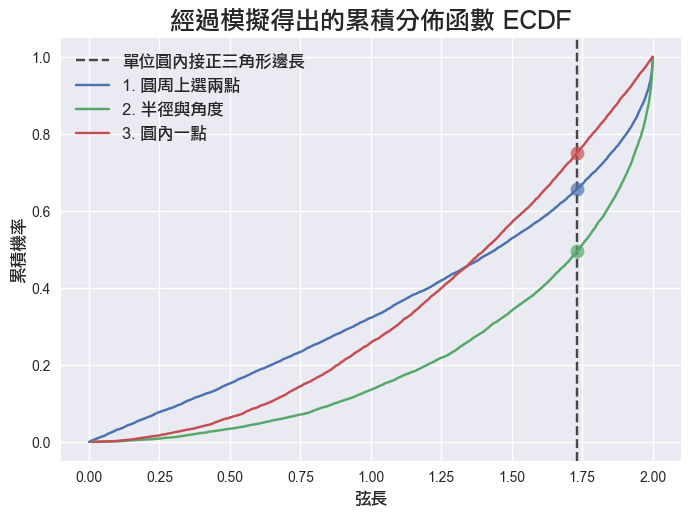

In [9]:
N = 10000  # 設定模擬次數。

x0 = np.sqrt(3)
plt.axvline(x = x0, color = 'k', alpha=0.7, linestyle='dashed', label = '單位圓內接正三角形邊長')
ax = plt.gca()
ys = np.linspace(0, 1, N+1)[1:]

def add_plot(sampling_method, label):
    arr = [sampling_method() for _ in range(N)]
    arr.sort()
    y0 = bisect.bisect_left(arr, x0) / N
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(arr, ys, label=label, color=color)
    plt.plot(x0, y0, marker='o', linestyle='none', alpha=0.7, markersize=10, color=color)
    
add_plot(random_chord_by_two_points,  '1. 圓周上選兩點')
add_plot(random_chord_by_radius,      '2. 半徑與角度')
add_plot(random_chord_by_inner_point, '3. 圓內一點')

plt.title('經過模擬得出的累積分佈函數 ECDF', fontname='LiHei Pro', fontsize=18)
plt.legend(loc='upper left', prop=font)
plt.xlabel('弦長', fontname='LiHei Pro', fontsize=12)
plt.ylabel('累積機率', fontname='LiHei Pro', fontsize=12)
plt.show()